In [132]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt


In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.compose         import ColumnTransformer
from sklearn.linear_model    import ElasticNet
from sklearn.pipeline        import Pipeline
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.metrics         import confusion_matrix, classification_report, accuracy_score
from joblib                  import dump, load
from sklearn.metrics         import mean_absolute_error, mean_squared_error
from sklearn.preprocessing   import OneHotEncoder
from sklearn.ensemble        import RandomForestClassifier

In [3]:
df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Исследуем отсутствующие значения

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
len(df)

891

### Буква в номере каюты, вероятно, отвечает за палубу или определенную часть корабля, что может сказаться на выживаемости

In [7]:
# df = df.drop(columns="Cabin")
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [8]:
pd.get_dummies(df, columns=['Cabin'], dtype=int, dummy_na=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0,1,0,0,0,0,0


# Аналогично рассматриваю и другие дискретные величины

In [9]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df1 = pd.concat(
    objs = [
        df.drop(columns=[ 'Survived', 'Parch','SibSp','PassengerId','Pclass', 'Name', 'Embarked', 'Sex', 'Ticket', 'Cabin']), 
        pd.get_dummies(df['Pclass'],   dtype=int, prefix = 'class'),
        pd.get_dummies(df['Embarked'], dtype=int),
        pd.get_dummies(df['Sex'],      dtype=int, drop_first=True),
        pd.get_dummies(df['Parch'],    dtype=int, prefix = 'parch'),
        pd.get_dummies(df['SibSp'],    dtype=int, prefix = 'SibSp'),
        pd.get_dummies(df['Cabin'],    dtype=int, prefix = 'Cabin', dummy_na=False)
        
    ], axis = 1)

df1

,Age,Fare,class_1,class_2,class_3,C,Q,S,male,parch_0,...,SibSp_5,SibSp_8,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,22.0,7.2500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,35.0,53.1000,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
887,19.0,30.0000,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
888,NaN,23.4500,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
889,26.0,30.0000,1,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [12]:
df1.isna().sum()

Age        177
Fare         0
class_1      0
class_2      0
class_3      0
C            0
Q            0
S            0
male         0
parch_0      0
parch_1      0
parch_2      0
parch_3      0
parch_4      0
parch_5      0
parch_6      0
SibSp_0      0
SibSp_1      0
SibSp_2      0
SibSp_3      0
SibSp_4      0
SibSp_5      0
SibSp_8      0
Cabin_A      0
Cabin_B      0
Cabin_C      0
Cabin_D      0
Cabin_E      0
Cabin_F      0
Cabin_G      0
Cabin_T      0
dtype: int64

# Далее буду заполнять пропущенные значения возраста, создав для этого модель
для начала рассмотрим датафрейм, в котором отсутсвуют данные о возрасте, необходимо обучить модель с лучшими гиперпараметрами (найденными ранее) на полной тестовой выборке с возрастом и заполнить отутвующие данные
## Важно: 
из признаков для предсказания возраста исключим **'Survival'**, чтобы избежать утчеки данных

In [13]:
df_for_pred_ages = df1[df['Age'].isna()]
df_for_train_ages = df1[df['Age'].isna() == False]

X = df_for_train_ages.drop(columns='Age')
y = df_for_train_ages['Age']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=228)

In [15]:
from sklearn.pipeline        import Pipeline

In [16]:
df_for_train_ages.columns

Index(['Age', 'Fare', 'class_1', 'class_2', 'class_3', 'C', 'Q', 'S', 'male',
       'parch_0', 'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5',
       'parch_6', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T'],
      dtype='object')

In [17]:
numeric_features = ['Fare']

pipe1 = Pipeline(
    steps = [
        ('scaler', ColumnTransformer(
            transformers=[
                ('numeric', StandardScaler(), numeric_features)
            ], remainder='passthrough')),
        ('model',  ElasticNet(max_iter = 10000))
    ]
)

gr_search = GridSearchCV(
    estimator    = pipe1,
    param_grid   = {
        'model__l1_ratio' : np.linspace(0, 1, 7),
        'model__alpha'    : [0.01, 0.3, 0.5, 0.6, 1., 2.]
    },
    cv           = 5,
    n_jobs       = 7
    
)

gr_search.fit(X_train, y_train)
dump(gr_search, 'for_ages')

/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.718e+04, tolerance: 1.042e+01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.642e+04, tolerance: 1.058e+01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

['for_ages']

In [18]:
gr_search = load('for_ages')
gr_search

,estimator,Pipeline(step...iter=10000))])
,param_grid,"{'model__alpha': [0.01, 0.3, ...], 'model__l1_ratio': array([0. ..., 1. ])}"
,scoring,None
,n_jobs,7
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numeric', ...)]"


In [19]:
#dump(gr_search, "for_ages")

In [20]:
gr_search.best_params_

{'model__alpha': 0.01, 'model__l1_ratio': np.float64(0.5)}

In [21]:
ages_pred = gr_search.predict(X_test)

In [22]:
mean_absolute_error(y_test, ages_pred)

9.350460783739713

In [23]:
np.sqrt(mean_squared_error(y_test, ages_pred))

np.float64(13.011348670157844)

### Предсказание возраста через случайные леса

In [196]:
from sklearn.ensemble import RandomForestRegressor

pipe_RF = Pipeline(
    steps=[("model", RandomForestRegressor())]
)

n = len(df_for_train_ages.columns)

gr_search_RF = GridSearchCV(
    estimator  =  pipe_RF,
    param_grid = {
        'model__n_estimators'      : np.arange(int(np.sqrt(n)), n, 3),
        'model__n_jobs'            : [7],
        'model__min_samples_split' : np.arange(2, 10),
        'model__ccp_alpha'         : np.linspace(0, 0.1, 20)
    },
    cv = 5
)

gr_search_RF.fit(X_train, y_train)
dump(gr_search_RF, 'for_ages_RF')

ages_pred_RF = gr_search_RF.predict(X_test)
gr_search_RF.best_params_

{'model__ccp_alpha': np.float64(0.042105263157894736),
 'model__min_samples_split': np.int64(9),
 'model__n_estimators': np.int64(26),
 'model__n_jobs': 7}

In [197]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [198]:
print('MAE: ', mean_absolute_error(y_test, ages_pred_RF))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, ages_pred_RF)))


MAE:  9.971964152701887
RMSE:  13.282614838982802


### Предсказание чемерз SVM

In [201]:
from sklearn.svm import SVR 

SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [203]:

pipe_svr = Pipeline( 
    steps = [
        ('scaler', ColumnTransformer(
            transformers=[
                ('numeric', StandardScaler(), numeric_features)
            ], remainder='passthrough')),
        ("model", SVR())]
)

n = len(df_for_train_ages.columns)

gr_search_svr = GridSearchCV(
    estimator  =  pipe_svr,
    param_grid = {
        'model__kernel'  : ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__degree'  : [2, 3],
        'model__max_iter': [int(1e7)],
        'model__C'       : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0]
    },
    cv = 5
)

gr_search_svr.fit(X_train, y_train)
dump(gr_search_svr, 'for_ages_svr')

gr_search_svr.best_params_

{'model__C': 1.0,
 'model__degree': 2,
 'model__kernel': 'linear',
 'model__max_iter': 10000000}

In [204]:
y_pred = gr_search_svr.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))


MAE:  10.006601734653891
RMSE:  13.92612312989573


# Лучше себя показала модель эластичной сети
Далее обучим модель по всем тестовым данным, которые у нас есть и заполним пропуски в исходном датафрейме

In [3]:
df = pd.read_csv("train.csv")
df['Cabin'] = df['Cabin'].str[0]
df1 = pd.concat(
    objs = [
        df.drop(columns=[ 'Survived','Parch','SibSp','PassengerId','Pclass', 'Name', 'Embarked', 'Sex', 'Ticket', 'Cabin']), 
        pd.get_dummies(df['Pclass'],   dtype=int, prefix = 'class'),
        pd.get_dummies(df['Embarked'], dtype=int),
        pd.get_dummies(df['Sex'],      dtype=int, drop_first=True),
        pd.get_dummies(df['Parch'],    dtype=int, prefix = 'parch'),
        pd.get_dummies(df['SibSp'],    dtype=int, prefix = 'SibSp'),
        pd.get_dummies(df['Cabin'],    dtype=int, prefix = 'Cabin', dummy_na=False)
        
    ], axis = 1)

df_for_pred_ages = df1[df['Age'].isna()]
df_for_train_ages = df1[df['Age'].isna() == False]

X = df_for_train_ages.drop(columns='Age')
y = df_for_train_ages['Age']

In [213]:
X.columns

Index(['Fare', 'class_1', 'class_2', 'class_3', 'C', 'Q', 'S', 'male',
       'parch_0', 'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5',
       'parch_6', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T'],
      dtype='object')

In [24]:
gr_search.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric', StandardScaler(), ['Fare'])])),
  ('model', ElasticNet(alpha=0.01, l1_ratio=np.float64(0.5), max_iter=10000))],
 'transform_input': None,
 'verbose': False,
 'scaler': ColumnTransformer(remainder='passthrough',
                   transformers=[('numeric', StandardScaler(), ['Fare'])]),
 'model': ElasticNet(alpha=0.01, l1_ratio=np.float64(0.5), max_iter=10000),
 'scaler__force_int_remainder_cols': 'deprecated',
 'scaler__n_jobs': None,
 'scaler__remainder': 'passthrough',
 'scaler__sparse_threshold': 0.3,
 'scaler__transformer_weights': None,
 'scaler__transformers': [('numeric', StandardScaler(), ['Fare'])],
 'scaler__verbose': False,
 'scaler__verbose_feature_names_out': True,
 'scaler__numeric': StandardScaler(),
 'scaler__numeric__copy': True,
 'scaler__numeric__with_mean': True,
 'scaler__numeric__with_std': True,
 'model__alpha': 0.01,
 'model__copy_X

In [26]:
numeric_features = ['Fare']

pipe_ages_final = gr_search.best_estimator_

pipe_ages_final.fit(X, y)
dump(pipe_ages_final, "for_ages_final")

['for_ages_final']

In [4]:
pipe_ages_final = load('for_ages_final')
predicted_years = pipe_ages_final.predict(df_for_pred_ages.drop(columns='Age'))
predicted_years

array([30.49368183, 34.02233665, 23.91506994, 26.25891918, 28.15439808,
       28.87971411, 34.87025128, 28.15541666, 26.25888607, 26.25363074,
       28.87849844, 29.11438936, 28.15541666, 20.69499028, 42.44489153,
       40.83989691, 19.7017454 , 28.87971411, 28.87849844, 28.15512102,
       28.87849844, 28.87849844, 28.87971411, 28.88066647, 26.70234544,
       28.87849844, 30.49926591, 11.74859673, 13.29024662, 28.88431272,
       28.87366962, 12.33977663, 36.24249612, 43.48013796, 15.42775422,
        9.99592739, 31.38009154, 46.36213155, 26.77054011, 30.49926591,
       28.15541666, 12.33977663, 29.17548863, 28.87971411, 13.08390498,
       26.53859108, 22.53429926, 26.77054011, 28.88480546, 38.09019713,
       30.49926591, 28.15541666, 43.44012779, 28.15541666, 34.12482575,
       46.55134219, 40.83989691, 42.48431041, 28.15541666, 24.92709215,
       33.80760472, 28.87849844, 37.84041306, 12.33977663, 22.58324291,
       38.96323157, 28.87971411, 25.14740751, 42.44883342, 26.25

# Совместим имеющиеся данные

In [5]:
df_for_pred_ages['Age'] = predicted_years
df_for_pred_ages['Age'] = df_for_pred_ages['Age'].apply(lambda x: int(x))

df_for_pred_ages

/tmp/ipykernel_22543/2016551748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_pred_ages['Age'] = predicted_years
/tmp/ipykernel_22543/2016551748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_pred_ages['Age'] = df_for_pred_ages['Age'].apply(lambda x: int(x))


,Age,Fare,class_1,class_2,class_3,C,Q,S,male,parch_0,...,SibSp_5,SibSp_8,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
5,30,8.4583,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
17,34,13.0000,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19,23,7.2250,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26,26,7.2250,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
28,28,7.8792,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,26,7.2292,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
863,9,69.5500,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
868,28,9.5000,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
878,28,7.8958,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_for_train_ages

,Age,Fare,class_1,class_2,class_3,C,Q,S,male,parch_0,...,SibSp_5,SibSp_8,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,22.0,7.2500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,35.0,53.1000,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,29.1250,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886,27.0,13.0000,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
887,19.0,30.0000,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
889,26.0,30.0000,1,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [7]:
df_res_ages = pd.concat([df_for_pred_ages, df_for_train_ages]).sort_index()
df_res_ages

,Age,Fare,class_1,class_2,class_3,C,Q,S,male,parch_0,...,SibSp_5,SibSp_8,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,22.0,7.2500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,35.0,53.1000,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
887,19.0,30.0000,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
888,14.0,23.4500,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
889,26.0,30.0000,1,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


# Вернемся к задаче предсказания выживания 

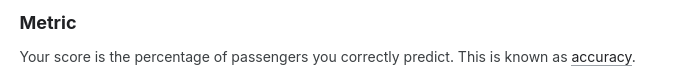

In [14]:
df_res_ages['Survived'] = df['Survived']

In [15]:
X = df_res_ages.drop(columns='Survived')
y = df_res_ages['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=313)

In [33]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:

pipe_survived_RF = Pipeline(
    steps = [
    # ('scaler', ColumnTransformer(transformers=[('numeric', StandardScaler(), numeric_features)])), 
    ('model',  RandomForestClassifier())
    ]
)

gr_search_survived = GridSearchCV(
    estimator  = pipe_survived_RF,
    param_grid = {
        'model__criterion'         : ['gini', 'entropy', 'log_loss'],
        'model__max_depth'         : np.arange(2, 8, 2),
        'model__n_estimators'      : np.arange(250, 350, 50),
        'model__max_features'      : [int(np.sqrt(len(X.columns)))],
        'model__min_samples_split' : [8, 10, 12],
        'model__min_samples_leaf'  : [1, 2],
        'model__bootstrap'         : [True, False] 
     },
    scoring='accuracy',
    cv = 7,
    n_jobs = 7
)

gr_search_survived.fit(X_train, y_train)
dump(gr_search_survived, 'RF_for_surviving')

['RF_for_surviving']

In [35]:
gr_search_survived.best_params_

{'model__bootstrap': True,
 'model__criterion': 'entropy',
 'model__max_depth': np.int64(6),
 'model__max_features': 5,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 8,
 'model__n_estimators': np.int64(300)}

In [36]:
y_pred = gr_search_survived.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       106
           1       0.80      0.59      0.68        73

    accuracy                           0.77       179
   macro avg       0.78      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179

Accuracy:  0.770949720670391


array([[95, 11],
       [30, 43]])

In [9]:
from sklearn.svm import SVC

In [10]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [39]:
pipe_survived_SV = Pipeline(
    steps = [
        ('scaler', ColumnTransformer(
            transformers=[
                ('numeric', StandardScaler(), numeric_features)
            ], remainder='passthrough')),
        ('model',  SVC())
    ]
)

gr_search_svc = GridSearchCV(
    estimator=pipe_survived_SV,
    param_grid = {
        'model__kernel'  : ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__degree'  : [2, 3],
        'model__max_iter': [int(1e7)],
        'model__C'       : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0]
    },
    scoring='accuracy',
    cv = 7,
    n_jobs= 7
)

gr_search_svc.fit(X_train, y_train)
dump(gr_search_svc, "gr_search_svc_survived")

['gr_search_svc_survived']

In [40]:
gr_search_svc.best_params_

{'model__C': 0.7,
 'model__degree': 2,
 'model__kernel': 'poly',
 'model__max_iter': 10000000}

In [41]:
y_pred = gr_search_svc.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       106
           1       0.76      0.66      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179

Accuracy:  0.776536312849162


array([[91, 15],
       [25, 48]])

In [16]:
pipe_survived_LR = Pipeline(
    steps = [
        ('scaler', ColumnTransformer(
            transformers=[
                ('numeric', StandardScaler(), numeric_features)
            ], remainder='passthrough')),
        ('model',  LogisticRegression())
    ]
)

gr_search_LR = GridSearchCV(
    estimator=pipe_survived_LR,
    param_grid = {
        "model__penalty" : ['l1', 'l2', 'elasticnet'],
        'model__l1_ratio': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0],
        'model__dual'    : [True, False],
        'model__C'       : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0],
        'model__max_iter': [int(1e7)]
    },
    scoring='accuracy',
    cv = 7,
    n_jobs= 7
)

gr_search_LR.fit(X_train, y_train)
dump(gr_search_LR, "gr_search_LR_survived")

/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/makra/.lo

['gr_search_LR_survived']

In [17]:
gr_search_LR.best_params_

{'model__C': 1.0,
 'model__dual': False,
 'model__l1_ratio': 0.01,
 'model__max_iter': 10000000,
 'model__penalty': 'l2'}

In [18]:
y_pred = gr_search_LR.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       106
           1       0.71      0.68      0.70        73

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179

Accuracy:  0.7597765363128491


array([[86, 20],
       [23, 50]])

In [45]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [20]:
pipe_survived_GB = Pipeline(
    steps = [
    # ('scaler', ColumnTransformer(transformers=[('numeric', StandardScaler(), numeric_features)])), 
    ('model',  GradientBoostingClassifier())
    ]
)

gr_search_survived_GB = GridSearchCV(
    estimator  = pipe_survived_GB,
    param_grid = {
        'model__loss'              : ['log_loss', 'exponential'],
        'model__learning_rate'     : [0.01, 0.1, 0.2],
        'model__criterion'         : ['friedman_mse'],
        'model__max_depth'         : [6, 7, 8, 9],
        'model__n_estimators'      : np.arange(200, 300, 50),
        'model__max_features'      : ['sqrt', 'log2'],
        'model__min_samples_split' : [8, 10, 12],
        'model__min_samples_leaf'  : [2, 4]
     },
    scoring='accuracy',
    cv = 7,
    n_jobs = 6
)

gr_search_survived_GB.fit(X_train, y_train)
dump(gr_search_survived_GB, 'GB_for_surviving')

['GB_for_surviving']

In [21]:
y_pred = gr_search_survived_GB.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       106
           1       0.80      0.60      0.69        73

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179

Accuracy:  0.776536312849162


array([[95, 11],
       [29, 44]])

In [126]:
gr_search_survived_GB.best_estimator_.get_params()

{'memory': None,
 'steps': [('model',
   GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=6,
                              max_features='log2', min_samples_leaf=4,
                              min_samples_split=8, n_estimators=np.int64(200)))],
 'transform_input': None,
 'verbose': False,
 'model': GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=6,
                            max_features='log2', min_samples_leaf=4,
                            min_samples_split=8, n_estimators=np.int64(200)),
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.01,
 'model__loss': 'exponential',
 'model__max_depth': 6,
 'model__max_features': 'log2',
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 8,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': np.int64(200),
 'model__n_iter_no_change': 

# Достигли accuracy = 0.7765 с моделью GradientBoosting, попробую усовершенстовать модель, при помощи признаков из исходных данных 

# Опробуем не удалять первый числовой категориальный признак, оценим как оно скажется на качестве моделей: 

In [38]:
df = pd.read_csv("train.csv")
df['Cabin'] = df['Cabin'].str[0]
df1 = pd.concat(
    objs = [
        df.drop(columns=[ 'Survived','Parch','SibSp', 'PassengerId','Pclass', 'Name', 'Embarked', 'Sex', 'Ticket', 'Cabin']), 
        pd.get_dummies(df['Pclass'],   dtype=int, prefix = 'class'),
        pd.get_dummies(df['Embarked'], dtype=int),
        pd.get_dummies(df['Sex'],      dtype=int, drop_first=True),
        pd.get_dummies(df['Parch'],    dtype=int, prefix = 'parch'),
        pd.get_dummies(df['SibSp'],    dtype=int, prefix = 'SibSp'),
        pd.get_dummies(df['Cabin'],    dtype=int, prefix = 'Cabin', dummy_na=False)
        
    ], axis = 1)

df_for_pred_ages = df1[df['Age'].isna()]
df_for_train_ages = df1[df['Age'].isna() == False]

X = df_for_train_ages.drop(columns='Age')
y = df_for_train_ages['Age']


pipe_ages_final = load('for_ages_final')

predicted_years = pipe_ages_final.predict(df_for_pred_ages.drop(columns='Age'))
df_for_pred_ages['Age'] = predicted_years

df_for_pred_ages['Age'] = df_for_pred_ages['Age'].apply(lambda x: int(x))

df_res_ages = pd.concat([df_for_pred_ages, df_for_train_ages]).sort_index()

df_res_ages['Survived'] = df['Survived']
df_res_ages['Parch']    = df['Parch']
df_res_ages['SibSp']   = df['SibSp']



X = df_res_ages.drop(columns='Survived')
y = df_res_ages['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=313)

/home/makra/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/tmp/ipykernel_22543/710141318.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_pred_ages['Age'] = predicted_years
/tmp/ipykernel_22543/710141318.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_pred_ages['Age'] = df_for_pred_ages['Age'].apply(lambda x: int(x))


In [41]:
X

,Age,Fare,class_1,class_2,class_3,C,Q,S,male,parch_0,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Parch,SibSp
0,22.0,7.2500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,26.0,7.9250,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,35.0,53.1000,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
887,19.0,30.0000,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
888,14.0,23.4500,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,1
889,26.0,30.0000,1,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [25]:
numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']

pipe_survived_RF_2 = Pipeline(
    steps = [
    # ('scaler', ColumnTransformer(transformers=[('numeric', StandardScaler(), numeric_features)])), 
    ('model',  RandomForestClassifier())
    ]
)

gr_search_survived_2 = GridSearchCV(
    estimator  = pipe_survived_RF_2,
    param_grid = {
        'model__criterion'         : ['gini', 'entropy', 'log_loss'],
        'model__max_depth'         : np.arange(2, 8, 2),
        'model__n_estimators'      : np.arange(250, 350, 50),
        'model__max_features'      : [int(np.sqrt(len(X.columns)))],
        'model__min_samples_split' : [8, 10, 12],
        'model__min_samples_leaf'  : [1, 2],
        'model__bootstrap'         : [True, False] 
     },
    scoring='accuracy',
    cv = 7,
    n_jobs = 7
)

gr_search_survived_2.fit(X_train, y_train)
dump(gr_search_survived_2, 'RF_for_surviving_2')



pipe_survived_SV_2 = Pipeline(
steps = [
    ('scaler', ColumnTransformer(
        transformers=[
            ('numeric', StandardScaler(), numeric_features)
        ], remainder='passthrough')),
    ('model',  SVC())
    ]
)

gr_search_svc_2 = GridSearchCV(
    estimator=pipe_survived_SV_2,
    param_grid = {
        'model__kernel'  : ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__degree'  : [2, 3],
        'model__max_iter': [int(1e7)],
        'model__C'       : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0]
    },
    scoring='accuracy',
    cv = 7,
    n_jobs= 7
)

gr_search_svc_2.fit(X_train, y_train)
dump(gr_search_svc_2, "gr_search_svc_survived_2")

['gr_search_svc_survived_2']

In [35]:
pipe_survived_GB_2 = Pipeline(
    steps = [
    # ('scaler', ColumnTransformer(transformers=[('numeric', StandardScaler(), numeric_features)])), 
    ('model',  GradientBoostingClassifier())
    ]
)

gr_search_survived_GB_2 = GridSearchCV(
    estimator  = pipe_survived_GB_2,
    param_grid = {
        'model__loss'              : ['log_loss', 'exponential'],
        'model__learning_rate'     : [0.01, 0.1],
        'model__criterion'         : ['friedman_mse'],
        'model__max_depth'         : [8, 9, 10],
        'model__n_estimators'      : np.arange(100, 250, 50),
        'model__max_features'      : ['sqrt', 'log2'],
        'model__min_samples_split' : [ 11, 12, 13],
        'model__min_samples_leaf'  : [3, 4]
     },
    scoring='accuracy',
    cv = 7,
    n_jobs = 7
)

gr_search_survived_GB_2.fit(X_train, y_train)
dump(gr_search_survived_GB_2, 'GB_for_surviving_2')

['GB_for_surviving_2']

In [26]:
y_pred = gr_search_survived_2.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       106
           1       0.80      0.60      0.69        73

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179

Accuracy:  0.776536312849162


array([[95, 11],
       [29, 44]])

In [27]:
y_pred = gr_search_svc_2.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.75      0.67      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179

Accuracy:  0.776536312849162


array([[90, 16],
       [24, 49]])

In [36]:
y_pred = gr_search_survived_GB_2.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       106
           1       0.82      0.58      0.68        73

    accuracy                           0.78       179
   macro avg       0.79      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179

Accuracy:  0.776536312849162


array([[97,  9],
       [31, 42]])

In [44]:
model = load('GB_for_surviving_2')

In [45]:
model = model.best_estimator_

In [46]:
pred = model.predict(X_test)

In [48]:
accuracy_score(y_test, pred)

0.776536312849162

# Добились accuracy = 0.7765 с моделью GradientBoosting

Для модели GB метрика не изменилась, при использвании ранее исключенных признаков, но для других моделей accuracy увеличилась, поэтому попробуем предсказывать возраст с помощью ранее исключенных признаков, оценим как повляиет это на точность конечного предсказания

### На данный момент имеем:

#### Обработка данных:  
1. one-hot-encoding без исключения изначального числового категориального признака
2. Предсказание возраста на основе данных, без признака Survived, при помощи модели эластичной сети

#### Модель предсказания:
1. Модель **GradientBoosting**
2. Поиск гиперпараметров по сетке со скорингом **accuracy**

#### Далее:
1. Рассмотреть показатели модели, если использовать указанную обработку данных для модели, предсказывающей возраст
2. Попробовать предсказывать при помощи GradienBoosting
3. Выбрать оптимальную комбинацию из моделей
4. Создать пайплайн для тестового набора данных с Kaggle:
    1. Осущеставляющий обработку данных при помощи ColumnTransfer, StandartScaler, OneHotEncoder
    2. Осуществляется предсказание возраста
    3. Осуществляется предсказание выживаемости
6. Обучить модели на полном объеме тренеровочных данных

In [102]:
df = pd.read_csv("train.csv")
df['Cabin'] = df['Cabin'].str[0]
df1 = pd.concat(
    objs = [
        df.drop(columns=[ 'Survived','PassengerId','Pclass', 'Name', 'Embarked', 'Sex', 'Ticket', 'Cabin']), 
        pd.get_dummies(df['Pclass'],   dtype=int, prefix = 'class'),
        pd.get_dummies(df['Embarked'], dtype=int),
        pd.get_dummies(df['Sex'],      dtype=int, drop_first=True),
        pd.get_dummies(df['Parch'],    dtype=int, prefix = 'parch'),
        pd.get_dummies(df['SibSp'],    dtype=int, prefix = 'SibSp'),
        pd.get_dummies(df['Cabin'],    dtype=int, prefix = 'Cabin', dummy_na=False)
        
    ], axis = 1)

df_for_pred_ages = df1[df['Age'].isna()]
df_for_train_ages = df1[df['Age'].isna() == False]

X = df_for_train_ages.drop(columns='Age')
y = df_for_train_ages['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=228)

In [55]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [56]:
pipe_ages_GB = Pipeline(
    steps = [
    # ('scaler', ColumnTransformer(transformers=[('numeric', StandardScaler(), numeric_features)])), 
    ('model',  GradientBoostingRegressor())
    ]
)

gr_search_ages_GB = GridSearchCV(
    estimator  = pipe_ages_GB,
    param_grid = {
        'model__loss'              : ['squared_error','absolute_error', 'huber'],
        'model__alpha'             : [0.8, 0.6, 0.9],
        'model__learning_rate'     : [0.01, 0.1],
        'model__criterion'         : ['friedman_mse'],
        'model__max_depth'         : [6, 7, 8],
        'model__n_estimators'      : np.arange(150, 250, 50),
        'model__max_features'      : ['sqrt'],
        'model__min_samples_split' : [8, 10, 12],
        'model__min_samples_leaf'  : [3, 4, 5]
     },
    scoring='neg_mean_absolute_error',
    cv = 7,
    n_jobs = 7
)

gr_search_ages_GB.fit(X_train, y_train)
dump(gr_search_ages_GB, 'gr_search_ages_GB')

['gr_search_ages_GB']

In [57]:
gr_search_ages_GB = load('gr_search_ages_GB')
ages_pred = gr_search_ages_GB.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, ages_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, ages_pred)))

MAE:  9.584648133548496
RMSE:  13.430981136695177


In [58]:
gr_search_ages_GB = load('gr_search_ages_GB')
ages_pred = gr_search_ages_GB.predict(X_train)

print('MAE: ', mean_absolute_error(y_train, ages_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, ages_pred)))

MAE:  8.12532847509883
RMSE:  10.422796644552378


In [59]:
gr_search_ages_GB.best_estimator_.get_params()

{'memory': None,
 'steps': [('model',
   GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=8,
                             max_features='sqrt', min_samples_leaf=3,
                             min_samples_split=12, n_estimators=np.int64(200)))],
 'transform_input': None,
 'verbose': False,
 'model': GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=8,
                           max_features='sqrt', min_samples_leaf=3,
                           min_samples_split=12, n_estimators=np.int64(200)),
 'model__alpha': 0.9,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.01,
 'model__loss': 'huber',
 'model__max_depth': 8,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 12,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': np.int64(200),
 'model__n_iter_no_change':

#### Получили MAE = 9.6 на тестовой выборке, что немного выше по точности в сравнении с MAE = 9.8 для модели SVM
Далее обучим модель с лучшими параметрами на всей выборке и спрогнозируем возвраст пассажиров

In [104]:
gr_search_ages_final = load('gr_search_ages_GB')

In [105]:
model_ages_final = gr_search_ages_final.best_estimator_

In [106]:
model_ages_final.fit(X, y)
dump(model_ages_final, "model_ages_final")

['model_ages_final']

In [107]:
mean_absolute_error(y, model_ages_final.predict(X))

8.146640185013794

In [108]:
age_pred = model_ages_final.predict(df_for_pred_ages.drop(columns='Age'))
df_for_pred_ages["Age"] = age_pred

df_for_pred_ages["Age"] = round(df_for_pred_ages["Age"])
df_for_pred_ages

/tmp/ipykernel_4621/2376699872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_pred_ages["Age"] = age_pred
/tmp/ipykernel_4621/2376699872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_pred_ages["Age"] = round(df_for_pred_ages["Age"])


,Age,SibSp,Parch,Fare,class_1,class_2,class_3,C,Q,S,...,SibSp_5,SibSp_8,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
5,30.0,0,0,8.4583,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17,32.0,0,0,13.0000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19,22.0,0,0,7.2250,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,28.0,0,0,7.2250,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28,24.0,0,0,7.8792,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,27.0,0,0,7.2292,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
863,16.0,8,2,69.5500,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
868,27.0,0,0,9.5000,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
878,28.0,0,0,7.8958,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df_ready = pd.concat([df_for_train_ages, df_for_pred_ages]).sort_index()
df_ready['Survived'] = df['Survived']
df_ready.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'class_1', 'class_2', 'class_3', 'C',
       'Q', 'S', 'male', 'parch_0', 'parch_1', 'parch_2', 'parch_3', 'parch_4',
       'parch_5', 'parch_6', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Survived'],
      dtype='object')

In [120]:
model_survival_final = load("GB_for_surviving_2")

In [121]:
model_survival_final = model_survival_final.best_estimator_

X = df_ready.drop(columns='Survived')
y = df_ready['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_survival_final.fit(X_train, y_train)

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,loss,'log_loss'
,learning_rate,0.01
,n_estimators,np.int64(100)
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,11
,min_samples_leaf,4


In [122]:
accuracy_score(y_test, model_survival_final.predict(X_test))

0.7877094972067039

In [134]:
from sklearn.base import BaseEstimator, TransformerMixin

#### Трансформер для заполнения пропусков отсутвия данных о возрасте 

In [154]:
class AgePredictor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = load("ages_full_train_data")
         # = model.best_estimator_
        self.features = None
        self.is_fitted = False
        
    def fit(self, X, y=None):
        # Обучаем модель только на данных с известным возрастом
        df_for_train = X[X['Age'].notna()]
        
        if len(df_for_train) > 0:
            self.model.fit(df_for_train.drop(columns='Age'), df_for_train['Age'])
            self.is_fitted = True
        
        return self

    def transform(self, X):
        print('age transforms')
        
        X_copy = X.copy()
        
        if not self.is_fitted:
            # Если модель не была обучена, возвращаем данные как есть
            return X_copy
        
        # Разделяем данные
        df_for_train = X_copy[X_copy['Age'].notna()]
        df_for_pred = X_copy[X_copy['Age'].isna()]
        
        # Предсказываем только для пропущенных значений
        if len(df_for_pred) > 0:
            predicted_ages = self.model.predict(df_for_pred.drop(columns='Age'))
            # predicted_ages = np.round(predicted_ages)  # раскомментируйте если нужно округление
            X_copy.loc[df_for_pred.index, 'Age'] = predicted_ages
        
        return X_copy

#### Трансофрмер для преобразования Cabin

In [17]:
df = pd.read_csv("train.csv")
df['Cabin'] = df['Cabin'].str[0]
df1 = pd.concat(
    objs = [
        df.drop(columns=['PassengerId','Pclass', 'Name', 'Embarked', 'Sex', 'Ticket', 'Cabin']), 
        pd.get_dummies(df['Pclass'],   dtype=int, prefix = 'class'),
        pd.get_dummies(df['Embarked'], dtype=int),
        pd.get_dummies(df['Sex'],      dtype=int, drop_first=True),
        pd.get_dummies(df['Parch'],    dtype=int, prefix = 'parch'),
        pd.get_dummies(df['SibSp'],    dtype=int, prefix = 'SibSp'),
        pd.get_dummies(df['Cabin'],    dtype=int, prefix = 'Cabin', dummy_na=False)
        
    ], axis = 1)
df1

,Survived,Age,SibSp,Parch,Fare,class_1,class_2,class_3,C,Q,...,SibSp_5,SibSp_8,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,19.0,0,0,30.0000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,0,NaN,1,2,23.4500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,26.0,0,0,30.0000,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
ap = AgePredictor()
ap.fit(df1)
ap.transform(df1)

,Survived,Age,SibSp,Parch,Fare,class_1,class_2,class_3,C,Q,...,SibSp_5,SibSp_8,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,22.000000,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38.000000,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,35.000000,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,35.000000,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,19.000000,0,0,30.0000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,0,23.249112,1,2,23.4500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,26.000000,0,0,30.0000,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [93]:
class TitanicTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.df = None
        self.all_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'class_1', 'class_2',
       'class_3', 'C', 'Q', 'S', 'male', 'parch_0', 'parch_1', 'parch_2',
       'parch_3', 'parch_4', 'parch_5', 'parch_6', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T']
        pass

    def fit(self, X, y=None):
        self.df = X.copy()
        return self


    def transform(self, X):
        print('titanic transforms')
        df = X
        df['Cabin'] = df['Cabin'].str[0]
        
        df = pd.concat(
            objs = [
        df.drop(columns=['PassengerId','Pclass', 'Name', 'Embarked', 'Sex', 'Ticket', 'Cabin', 'Age']), 
                pd.get_dummies(df['Pclass'],   dtype=int, prefix = 'class'),
                pd.get_dummies(df['Embarked'], dtype=int),
                pd.get_dummies(df['Sex'],      dtype=int, drop_first=True),
                pd.get_dummies(df['Parch'],    dtype=int, prefix = 'parch'),
                pd.get_dummies(df['SibSp'],    dtype=int, prefix = 'SibSp'),
                pd.get_dummies(df['Cabin'],    dtype=int, prefix = 'Cabin', dummy_na=True)
                
            ], axis = 1)
        for col in self.all_cols:
            if col not in df.columns:
                df[col] = 0
        for col in df:
            if col not in self.all_cols:
                df = df.drop(columns = col)
        return df[self.all_cols]

In [22]:
import sklearn
print(sklearn.__version__) 

1.7.2


In [144]:
from sklearn import set_config
set_config(transform_output="pandas")

In [155]:
# gr_search_ages_final = load('gr_search_ages_GB')
model_survival_final = load("GB_for_surviving_2").best_estimator_

# other_features = ['Cabin', 'PassengerId', 'Name', 'Ticket']
# categorial_features = ['Parch','SibSp','Pclass', 'Embarked', 'Sex', 'Cabin']

final_pipe = Pipeline(
    steps = [
        ("preprocessor",  TitanicTransformer()),
        ("age_predictor", AgePredictor()),
        ("model",         model_survival_final)
    ]
)

In [146]:
X = df.drop(columns='Survived')
y = df['Survived']
sum(X['Age'].isna())

177

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [148]:
final_pipe.fit(X_train, y_train)

titanic transforms


/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

age transforms


,steps,"[('preprocessor', ...), ('age_predictor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,loss,'log_loss'
,learning_rate,0.01
,n_estimators,np.int64(100)


In [149]:
pred = final_pipe.predict(X_test)

titanic transforms
age transforms


In [150]:
accuracy_score(y_test, pred)

0.7821229050279329

In [151]:
df = pd.read_csv("train.csv")
df['Cabin'] = df['Cabin'].str[0]
df1 = pd.concat(
    objs = [
        df.drop(columns=[ 'Survived','PassengerId','Pclass', 'Name', 'Embarked', 'Sex', 'Ticket', 'Cabin']), 
        pd.get_dummies(df['Pclass'],   dtype=int, prefix = 'class'),
        pd.get_dummies(df['Embarked'], dtype=int),
        pd.get_dummies(df['Sex'],      dtype=int, drop_first=True),
        pd.get_dummies(df['Parch'],    dtype=int, prefix = 'parch'),
        pd.get_dummies(df['SibSp'],    dtype=int, prefix = 'SibSp'),
        pd.get_dummies(df['Cabin'],    dtype=int, prefix = 'Cabin', dummy_na=False)
        
    ], axis = 1)

df_for_pred_ages = df1[df['Age'].isna()]
df_for_train_ages = df1[df['Age'].isna() == False]

X = df_for_train_ages.drop(columns='Age')
y = df_for_train_ages['Age']


In [152]:
model_ages = load('for_ages')

In [153]:
model_ages.fit(X, y)
dump(model_ages, 'ages_full_train_data')
X.columns

/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.182e+04, tolerance: 1.174e+01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.063e+04, tolerance: 1.213e+01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

Index(['SibSp', 'Parch', 'Fare', 'class_1', 'class_2', 'class_3', 'C', 'Q',
       'S', 'male', 'parch_0', 'parch_1', 'parch_2', 'parch_3', 'parch_4',
       'parch_5', 'parch_6', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T'],
      dtype='object')

In [156]:
df = pd.read_csv("train.csv")
X = df.drop(columns='Survived')
y = df['Survived']

final_pipe.fit(X, y)

titanic transforms


/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/makra/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

age transforms


,steps,"[('preprocessor', ...), ('age_predictor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,loss,'log_loss'
,learning_rate,0.01
,n_estimators,np.int64(100)


In [157]:
accuracy_score(y, final_pipe.predict(X))

titanic transforms
age transforms


0.8507295173961841

In [158]:
df2 = pd.read_csv('test.csv')
X = df2.copy()
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [159]:
X.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [160]:
X['Fare'] = X['Fare'].fillna(X['Fare'].mean())
X[X['Fare'].isna()]['Fare']

Series([], Name: Fare, dtype: float64)

In [161]:
X.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [162]:
df_res = df2[['PassengerId']].copy()
df_res['Survived'] = final_pipe.predict(X)

titanic transforms
age transforms


In [163]:
df_res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [164]:
df_res.to_csv('res1.csv', index=False)

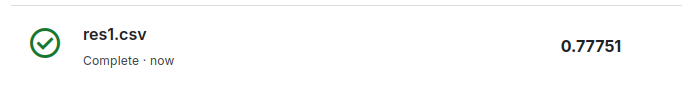